# **Model Building for Vegetable Disease Prediction** ðŸŒ¿

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import os
import zipfile
import random
import shutil
import tensorflow as tf
from os import getcwd
from os import listdir
import cv2
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from keras.utils import load_img , img_to_array
import imutils
%matplotlib inline

Importing data from Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/Fertilizers_Recommendation_ System_For_Disease_ Prediction.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()

**Image Processing**

In [4]:
TRAINING_DIR = "/content/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set"

train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = "/content/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set"

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=100,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

Found 11386 images belonging to 9 classes.
Found 3416 images belonging to 9 classes.


In [5]:
x_train=train_datagen.flow_from_directory(r"/content/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 11386 images belonging to 9 classes.


In [6]:
test_datagen=ImageDataGenerator(rescale=1./255)
x_test=test_datagen.flow_from_directory(r"/content/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 3416 images belonging to 9 classes.


In [7]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

**Training Model**

In [13]:
from keras.models import Sequential
from keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten
model=Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 127008)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [15]:
model.add(Dense(6,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
len(x_train)

475

In [16]:
1238/24

51.583333333333336

# **Saving the Model**

In [18]:
model.save('vegetable_Disease_Prediction.h5')

# **Testing the Model**

In [19]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [21]:
model=load_model('vegetable_Disease_Prediction.h5')

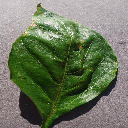

In [40]:
img=image.load_img(r"/content/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Pepper,_bell___Bacterial_spot/afc76c77-fd2d-4b7f-b1ad-14ba4d5fe297___NREC_B.Spot 9113.JPG",target_size=(128,128))
img

In [41]:
x=image.img_to_array(img)

In [42]:
x

array([[[201., 195., 197.],
        [202., 196., 198.],
        [199., 193., 195.],
        ...,
        [182., 176., 178.],
        [179., 173., 175.],
        [177., 171., 173.]],

       [[206., 200., 202.],
        [206., 200., 202.],
        [202., 196., 198.],
        ...,
        [178., 172., 174.],
        [180., 174., 176.],
        [181., 175., 177.]],

       [[192., 186., 188.],
        [198., 192., 194.],
        [211., 205., 207.],
        ...,
        [180., 174., 176.],
        [173., 167., 169.],
        [174., 168., 170.]],

       ...,

       [[147., 135., 137.],
        [129., 117., 119.],
        [138., 126., 128.],
        ...,
        [170., 158., 160.],
        [114., 102., 104.],
        [110.,  98., 100.]],

       [[109.,  97.,  99.],
        [118., 106., 108.],
        [133., 121., 123.],
        ...,
        [138., 126., 128.],
        [140., 128., 130.],
        [149., 137., 139.]],

       [[134., 122., 124.],
        [124., 112., 114.],
        [131., 1

In [43]:
x=np.expand_dims(x,axis=0)
x

array([[[[201., 195., 197.],
         [202., 196., 198.],
         [199., 193., 195.],
         ...,
         [182., 176., 178.],
         [179., 173., 175.],
         [177., 171., 173.]],

        [[206., 200., 202.],
         [206., 200., 202.],
         [202., 196., 198.],
         ...,
         [178., 172., 174.],
         [180., 174., 176.],
         [181., 175., 177.]],

        [[192., 186., 188.],
         [198., 192., 194.],
         [211., 205., 207.],
         ...,
         [180., 174., 176.],
         [173., 167., 169.],
         [174., 168., 170.]],

        ...,

        [[147., 135., 137.],
         [129., 117., 119.],
         [138., 126., 128.],
         ...,
         [170., 158., 160.],
         [114., 102., 104.],
         [110.,  98., 100.]],

        [[109.,  97.,  99.],
         [118., 106., 108.],
         [133., 121., 123.],
         ...,
         [138., 126., 128.],
         [140., 128., 130.],
         [149., 137., 139.]],

        [[134., 122., 124.],
       

In [44]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 50ms/step


In [33]:
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']

In [37]:
index[y[0]]

'Pepper,_bell___Bacterial_spot'

In [39]:
img=image.load_img(r"/content/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Pepper,_bell___Bacterial_spot/ae40949c-47ac-49ce-9a5d-00e15fa79d66___NREC_B.Spot 1785.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']
index[y[0]]

1/1 [==============================] - 0s 48ms/step


'Pepper,_bell___Bacterial_spot'

# **Predicted output**

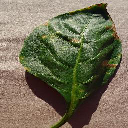

In [45]:
img=image.load_img(r"/content/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Pepper,_bell___Bacterial_spot/ae40949c-47ac-49ce-9a5d-00e15fa79d66___NREC_B.Spot 1785.JPG",target_size=(128,128))
img

In [49]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']
print("Predicted Output :  ",index[y[0]])

1/1 [==============================] - 0s 61ms/step
Predicted Output :   Pepper,_bell___Bacterial_spot
